# I. Exploratory Data Analysis

In [1]:
# Link to the Titanic data guide - https://www.kaggle.com/c/titanic/data
# This removes various warnings, specifically the deprecation warning
import warnings
warnings.filterwarnings('ignore')

# This is a 'magic' function in iPython. It will make your plot outputs appear and be stored within the notebook.
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# Adjusts the style to emulate ggplot (a popular plotting package for R).
plt.style.use('ggplot')
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
plt.rcParams['axes.xmargin'] = 0.1

In [2]:
# Read in the 'train' dataset to begin exploring what we have.
data = pd.read_csv('~/Desktop/GH/Kaggle/Titanic/train.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are 177 values missing from the age column, 687 values missing from the cabin column, and 2 values missing from the embarked column. Let's replace the null values in the age column with the median age, since it is a more robust value than the mean.

SibSp = # of siblings/spouses on board

Parch = # of parents/children on board

In [5]:
# To play around with the data we will add the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


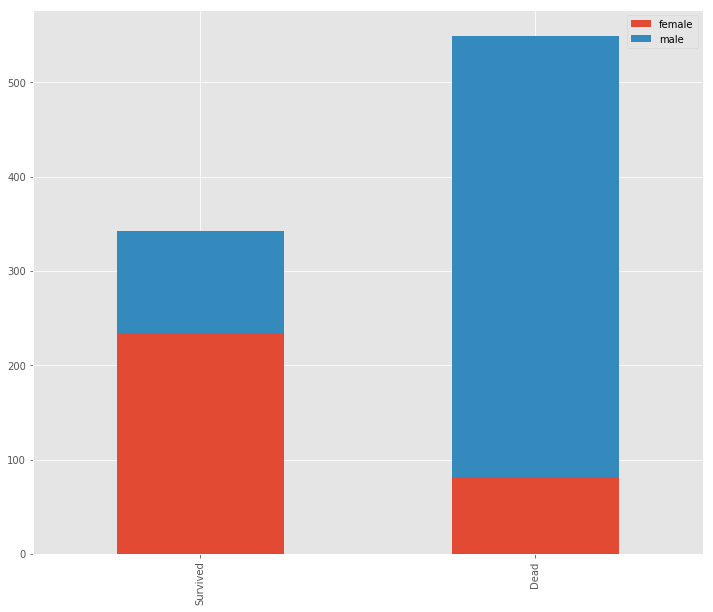

In [7]:
survived_gender = data[data['Survived']==1]['Sex'].value_counts()
dead_gender = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_gender,dead_gender])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(12,10))

Right away we can see that women are more likely to survive, while men are many time more likely to die.

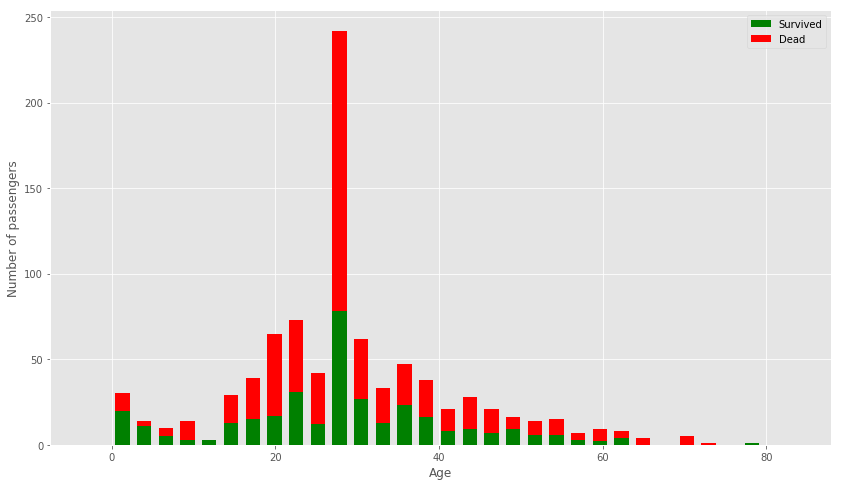

In [8]:
figure = plt.figure(figsize=(14,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color=['g','r']
         , bins=30, label=['Survived','Dead'], width=1.75)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Women and children first! Just look at the previous two graphs we can see that women and children were more likely to survive.

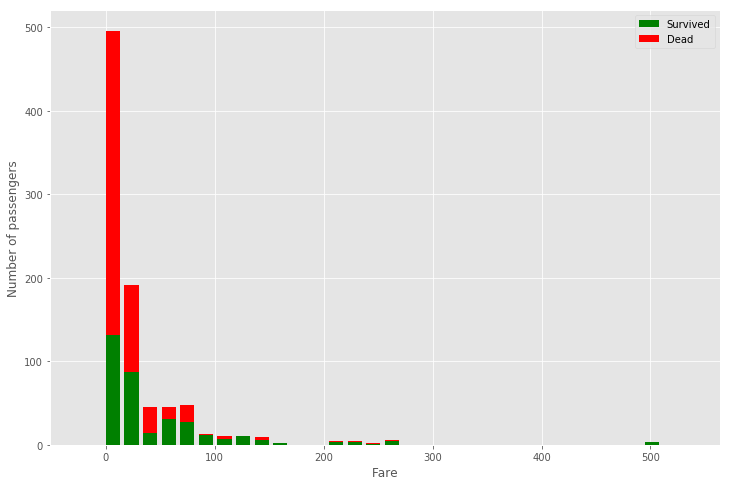

In [9]:
figure = plt.figure(figsize=(12,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color=['g','r']
         , bins=30, label=['Survived','Dead'], width=13)
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Passengers with the cheap seats were more likely to die. The more expensive your ticket may have meant easier access to rescue boats.

(-50, 550)

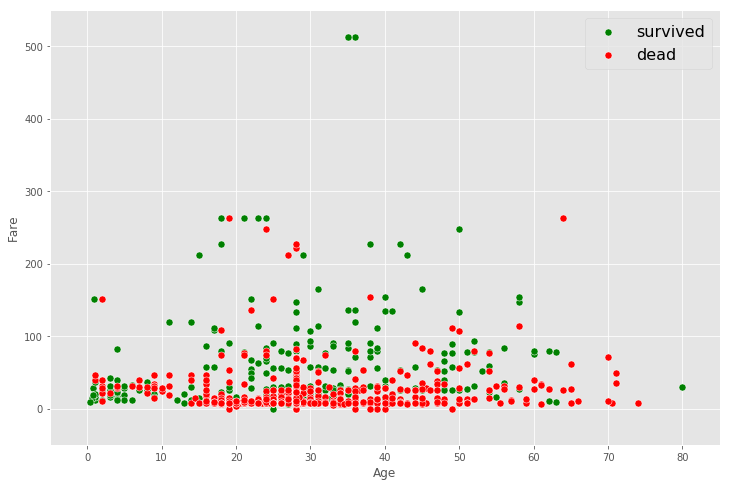

In [10]:
plt.figure(figsize=(12,8))
fare_survival = plt.subplot()
fare_survival.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green'
                      ,s=50, edgecolor='white')
fare_survival.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red'
                      ,s=50, edgecolor='white')
fare_survival.set_xlabel('Age')
fare_survival.set_ylabel('Fare')
fare_survival.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=16)
fare_survival.set_xlim([-5,85])
fare_survival.set_ylim([-50,550])

Passengers that paid more than 100 dollars were far more likely to survive than others, while those that paid less than $50 and were between the ages of 15 and 55 were highly likely to die.

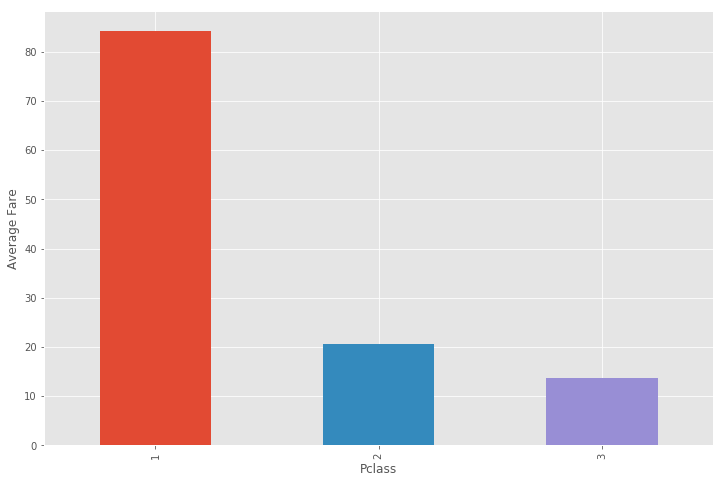

In [11]:
ticket_class = plt.subplot()
ticket_class.set_ylabel('Average Fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(12,8),ax=ticket_class)

The average fare of tickets correlates with the class of ticket.

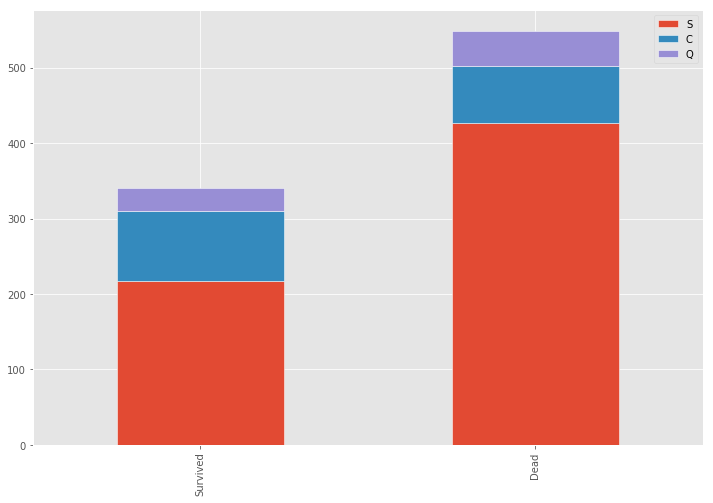

In [12]:
embark_survived = data[data['Survived']==1]['Embarked'].value_counts()
embark_dead = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([embark_survived,embark_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(12,8), edgecolor='white')

There seems to be no correlation here between the site that passengers embarked from.

# II. Feature Engineering

We'll be adding some features that will make feeding the data sets into a machine learning algorithm easier. Below is a print function that tells us wether or not a feature has been processed.

In [13]:
def status(feature):
    print('Processing',feature,': ok')

Let's load the data sets and combine them; an easy trick when starting a machine learning problem is to combine the sets of data. This will also save work for later on.

Start by loading the data sets and combining them into a dataframe called **combined**.

In [14]:
def combined_data():
    # Read in the train data set
    train = pd.read_csv('~/Desktop/GH/Kaggle/Titanic/train.csv')
    
    # Read in the test data set
    test = pd.read_csv('~/Desktop/GH/Kaggle/Titanic/test.csv')

    # Extracts and then removes the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)

    # Merges the train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [15]:
combined = combined_data()

In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


The test and train sets are now combined with 1,309 rows.

In [17]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting Passenger Titles

As you can see above, each passenger has some sort of title attached to their name. We are going to extract the titles to a more simple form seen in the dictionary map below to a new column called 'Title'.

In [18]:
def get_titles():
    global combined
    
    # Extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # Map of aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    
    # Map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [19]:
get_titles()

### Processing the Ages

In the train data set we saw that we were missing a large number of ages from the set. Only replacing them with the mean or median age isn't the best solution and let's illustrate that by grouping the data by sex, class and title.

In [20]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

The median age varies based on sex, class, and title. We can create a function that fills in the missing age based on these criteria rather than just the overall median age.

In [21]:
def process_age():
    global combined
    
    # This function will fill in the missing values of the Age variable
    def fill_age(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
            
    combined.Age = combined.apply(lambda r: fill_age(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [22]:
process_age()

Processing age : ok


In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


The missing age values have been filled in. We are still missing some values in Fare, Embarked and a LOT in Cabin. First let's process the names by dropping the Name column since we created a Title column.

### Processing Names

In [24]:
def process_name():
    
    global combined
    # Get rid of the Name column
    combined.drop('Name', axis=1, inplace=True)
    
    # Let's get dummy columns
    dummies_columns = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, dummies_columns], axis=1)
    
    # Now drop the column 'Title'
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')

In [25]:
process_name()

Processing names : ok


In [26]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


We now have a binary feature depending on what the title of the person was. If they were a Mr in the 'Title' column they have have a 1 in the Title_Mr column.

### Processing Fare

In [27]:
def process_fare():
    
    global combined
    # There's one missing fare value - replacing it with the median Fare.
    combined.Fare.fillna(combined.Fare.median(),inplace=True)
    
    status('fare')

In [28]:
process_fare()

Processing fare : ok


### Processing Embarked

In [29]:
def process_embarked():
    
    global combined
    # There are only two missing embarked values - let's fill them with the most frequent one (S)
    combined.Embarked.fillna('S',inplace=True)
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')

In [30]:
process_embarked()

Processing embarked : ok


### Processing Cabin

This cabin function will replace NaN values with 'Unknown' and clean up cabin names by replacing the value with only the first letter of the cabin. Then it will encode the cabin values to dummy columns.

In [31]:
def process_cabin():
    global combined
    
    # replacing missing cabins with U (for unknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    combined = pd.concat([combined,cabin_dummies],axis=1)
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')

In [32]:
process_cabin()

Processing cabin : ok


In [33]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8

In [34]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processing Gender

In [35]:
def process_gender():
    global combined
    
    # Map the gender to a binary variable, 1 for male and 0 for female.
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    
    status('gender')

In [36]:
process_gender()

Processing gender : ok


### Processing Class

In [37]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

In [38]:
process_pclass()

Processing pclass : ok


### Processing Ticket

In [39]:
def process_ticket():
    global combined
    
    # A function that extracts each prefix of the ticket, returns 'XXX' if no prefix (if the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)

    status('ticket')

In [40]:
process_ticket()

Processing ticket : ok


### Processing Family

In [41]:
def process_family():
    global combined
    
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Single'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')

In [42]:
process_family()

Processing family : ok


In [43]:
combined.shape

(1309, 68)

In [44]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Single,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [45]:
def scale_all_features():
    
    global combined
    
    features = list(combined.columns)
    features.remove('PassengerId')
    combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)
    
    print('Features scaled successfully !')

In [46]:
scale_all_features()

Features scaled successfully !


# III. Modeling

In this third section we will use everything we found out about the passengers to create and build a statistical model. This will read information about the passenger and decide wether they survived or not.

In this tutorial I will be practicing using Random Forests as a model.

We now have to:
1. Break the combined dataset in train set and test set.
2. Use the train set to build a predictive model.
3. Evaluate the model using the train set.
4. Test the model using the test set and generate and output file for the submission.

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Above are the tools we are going to import to complete the modeling:
1. from sklearn.pipeline import make_pipeline - This constructs a pipeline from the given estimators.
2. from sklearn.ensemble import RandomForestClassifier - A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.
3. from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier - it allows for the optimization of arbitrary differentiable loss functions.
4. from sklearn.model_selection import cross_val_score - Evaluate a score by cross-validation.


Below is a scoring functin that will determine the accuracy of our model.

In [48]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [49]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('~/Desktop/GH/Kaggle/Titanic/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [50]:
train, test, targets = recover_train_test_target()

### Feature Selection

We have over 30 features, which is a lot. We need to narrow this down. We need to reduce the dimensionality by picking the "right" features that capture the essential bits of data.

Feature selection decreases the redundancy in the data, speeds up the training process, and reduces overfitting.

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [51]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

Now let's see the importance of each feature.

In [52]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

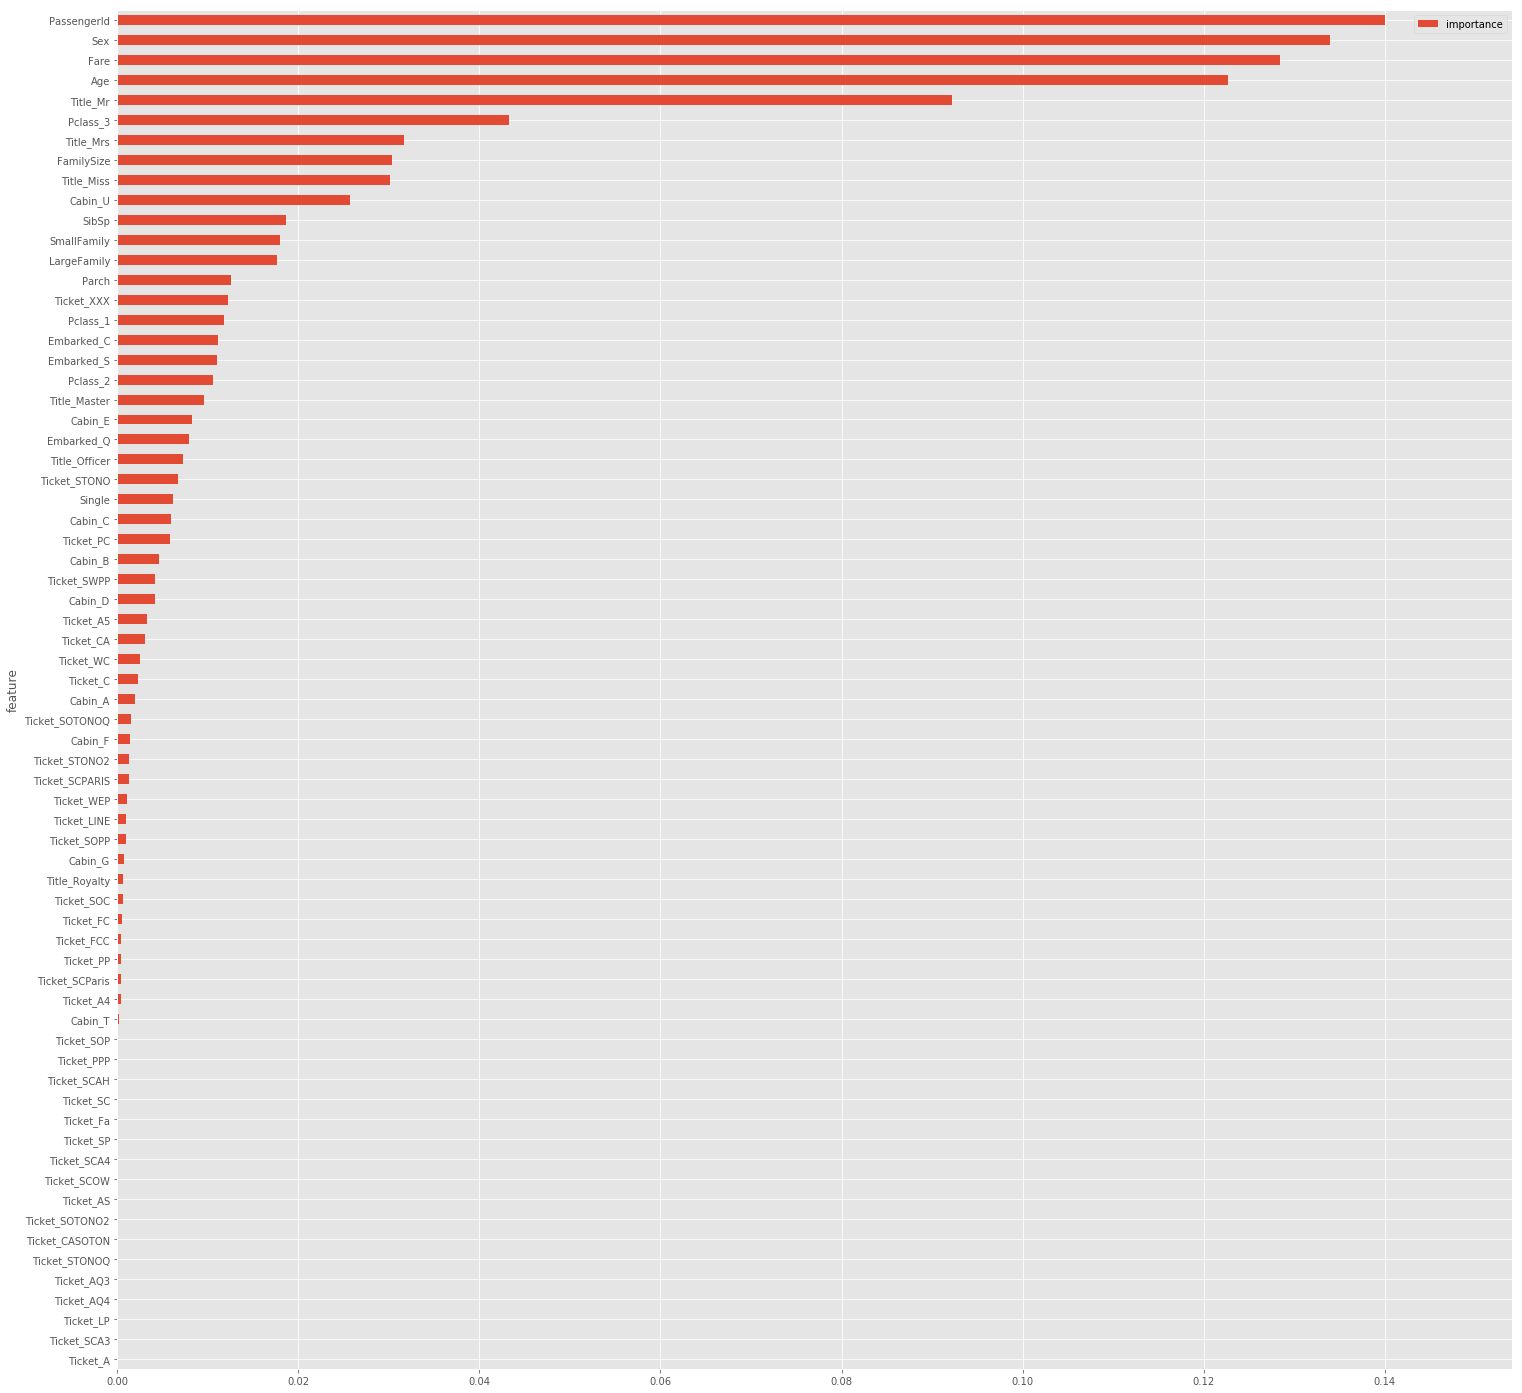

In [53]:
features.plot(kind='barh', figsize=(25, 25))

Fare, age, sex, and titles appear to have a high importance. Let's transform the train and test sets into more compact datasets.

In [54]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 13)


In [55]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 13)


Now we have a lot less features, we'll now find out if we use the reduced or full version of the train set.

### Let's test some different Base Models

In [56]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [57]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.817052529144932
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8226706485277079
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8160108192569154
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.7791393818043704
****


### Hyperparameter Tuning

We are going to be tuning the Random Forest model which doesn't appear to be the best fit, but we can fine tune the parameters to get an optimal model for the prediction task.

We will also start with the full train set.

In [58]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Now that the model is built by scanning several combinations of the hyperparameters, we can generate an output file to submit on Kaggle.

In [59]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('~/Desktop/GH/Kaggle/Titanic/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('~/desktop/GH/Kaggle/titanic/gridsearch_rf.csv', index=False)